#**Step 1: Install All the Required Packages**

In [ ]:
!pip install -q accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df=pd.read_csv("ProcessedDataset.csv")
df=df.drop(df.columns[0], axis=1)
df


,AV_manufacturer,AVyear,AVmake,AVmodel,AVregloc,AccidentZIPcode,AccidentSTATE,AccidentCOUNTY,AccidentCITY,AccidentADDRESS,...,AccOTHERfactorsSTOPGOTRAFFIC-Status,AccOTHERfactorsENTERINGORLEAVINGRAMP-Status,AccOTHERfactorsPREVIOUSCOLLISION-Status,AccOTHERfactorsUNFAMILIARWITHROAD-Status,AccOTHERfactorsDEFECTIVEWEHEQUIPYes-Status,AccOTHERfactorsDEFECTIVEWEHEQUIPNo-Status,AccOTHERfactorsUNINVOLVEDVEHICLE-Status,AccOTHERfactorsOTHER-Status,AccOTHERfactorsNONEAPPARENT-Status,AccOTHERfactorsRUNAWAYVEHICLE-Status
0,"Aimotive , Inc",2010.0,Toyota,Prius,CA,94043.0,CA,Santa Clara,View,"SB , 101 US Freeway Old Middlefield Rd x Shorline",...,AccOTHERfactorsSTOPGOTRAFFIC-No,AccOTHERfactorsENTERINGORLEAVINGRAMP-No,AccOTHERfactorsPREVIOUSCOLLISION-No,AccOTHERfactorsUNFAMILIARWITHROAD-No,AccOTHERfactorsDEFECTIVEWEHEQUIPYes-No,AccOTHERfactorsDEFECTIVEWEHEQUIPNo-No,AccOTHERfactorsUNINVOLVEDVEHICLE-No,AccOTHERfactorsOTHER-No,AccOTHERfactorsNONEAPPARENT-No,AccOTHERfactorsRUNAWAYVEHICLE-No
1,Apple Inc,2017.0,Lexus,RX 450h,California,94087.0,CA,Santa Clara,,Sunnyvale Community Center Park Entrance,...,AccOTHERfactorsSTOPGOTRAFFIC-No,AccOTHERfactorsENTERINGORLEAVINGRAMP-No,AccOTHERfactorsPREVIOUSCOLLISION-No,AccOTHERfactorsUNFAMILIARWITHROAD-No,AccOTHERfactorsDEFECTIVEWEHEQUIPYes-No,AccOTHERfactorsDEFECTIVEWEHEQUIPNo-No,AccOTHERfactorsUNINVOLVEDVEHICLE-No,AccOTHERfactorsOTHER-No,AccOTHERfactorsNONEAPPARENT-No,AccOTHERfactorsRUNAWAYVEHICLE-No
2,Aurora Innovation Inc,2017.0,Lincoln,MKZ,California,94107.0,CA,San Francisco,Francisco,Townsend 3rd,...,AccOTHERfactorsSTOPGOTRAFFIC-No,AccOTHERfactorsENTERINGORLEAVINGRAMP-No,AccOTHERfactorsPREVIOUSCOLLISION-No,AccOTHERfactorsUNFAMILIARWITHROAD-No,AccOTHERfactorsDEFECTIVEWEHEQUIPYes-No,AccOTHERfactorsDEFECTIVEWEHEQUIPNo-Yes,AccOTHERfactorsUNINVOLVEDVEHICLE-No,AccOTHERfactorsOTHER-No,AccOTHERfactorsNONEAPPARENT-No,AccOTHERfactorsRUNAWAYVEHICLE-No
3,Cruise LLC,2020.0,Cheverolet,Bolt,CA,94109.0,CA,San Francisco,Francisco,Hyde St Sutter,...,AccOTHERfactorsSTOPGOTRAFFIC-No,AccOTHERfactorsENTERINGORLEAVINGRAMP-No,AccOTHERfactorsPREVIOUSCOLLISION-No,AccOTHERfactorsUNFAMILIARWITHROAD-No,AccOTHERfactorsDEFECTIVEWEHEQUIPYes-No,AccOTHERfactorsDEFECTIVEWEHEQUIPNo-No,AccOTHERfactorsUNINVOLVEDVEHICLE-No,AccOTHERfactorsOTHER-No,AccOTHERfactorsNONEAPPARENT-No,AccOTHERfactorsRUNAWAYVEHICLE-No
4,Cruise LLC,2020.0,Chevrolet,Bolt,CA,94111.0,CA,San Francisco,Francisco,The Embarcadero Battery St,...,AccOTHERfactorsSTOPGOTRAFFIC-No,AccOTHERfactorsENTERINGORLEAVINGRAMP-No,AccOTHERfactorsPREVIOUSCOLLISION-No,AccOTHERfactorsUNFAMILIARWITHROAD-No,AccOTHERfactorsDEFECTIVEWEHEQUIPYes-No,AccOTHERfactorsDEFECTIVEWEHEQUIPNo-No,AccOTHERfactorsUNINVOLVEDVEHICLE-No,AccOTHERfactorsOTHER-No,AccOTHERfactorsNONEAPPARENT-No,AccOTHERfactorsRUNAWAYVEHICLE-No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Zoox Inc,2016.0,Toyota,Highlander,CA,94105.0,CA,San Francisco,Francisco,Folsom St near Essex,...,AccOTHERfactorsSTOPGOTRAFFIC-No,AccOTHERfactorsENTERINGORLEAVINGRAMP-No,AccOTHERfactorsPREVIOUSCOLLISION-No,AccOTHERfactorsUNFAMILIARWITHROAD-No,AccOTHERfactorsDEFECTIVEWEHEQUIPYes-No,AccOTHERfactorsDEFECTIVEWEHEQUIPNo-No,AccOTHERfactorsUNINVOLVEDVEHICLE-No,AccOTHERfactorsOTHER-No,AccOTHERfactorsNONEAPPARENT-No,AccOTHERfactorsRUNAWAYVEHICLE-No
323,Zoox Inc,2016.0,Toyota,Highlander,CA,94103.0,CA,San Francisco,Francisco,10th Street Folsom Intersection,...,AccOTHERfactorsSTOPGOTRAFFIC-No,AccOTHERfactorsENTERINGORLEAVINGRAMP-No,AccOTHERfactorsPREVIOUSCOLLISION-No,AccOTHERfactorsUNFAMILIARWITHROAD-No,AccOTHERfactorsDEFECTIVEWEHEQUIPYes-No,AccOTHERfactorsDEFECTIVEWEHEQUIPNo-No,AccOTHERfactorsUNINVOLVEDVEHICLE-No,AccOTHERfactorsOTHER-No,AccOTHERfactorsNONEAPPARENT-No,AccOTHERfactorsRUNAWAYVEHICLE-No
324,Zoox Inc,2016.0,Toyota,Highlander,CA,94133.0,CA,San Francisco,Francisco,"Pacific Ave , Kearny St Columbus Intersectio",...,AccOTHERfactorsSTOPGOTRAFFIC-No,AccOTHERfactorsENTERINGORLEAVINGRAMP-No,AccOTHERfactorsPREVIOUS

In [ ]:

df['FullText'] =  df.apply(lambda row: ', '.join([f'{col}:{value}' for col, value in zip(df.columns, row) if col != 'AccDETAILS']), axis=1)

dfnew=pd.DataFrame()
def format_string(row):
    return f"<s>[INST] {row['FullText']} [/INST] {row['AccDETAILS']} </s>"

# Apply the function to each row
dfnew['Formatted'] = df.apply(format_string, axis=1)

# Display the DataFrame with the new 'Formatted' column
dfnew[['Formatted']].iloc[0].values

In [ ]:
dfnew.to_csv("llamaformatted.csv")

#**Step 2: Import All the Required Libraries**

In [ ]:
import os
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

/usr/local/lib/python3.10/dist-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


#**In case of Llama 2, the following prompt template is used for the chat models**

System Prompt (optional) to guide the model


User prompt (required) to give the instruction


Model Answer (required)

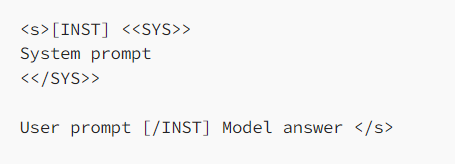

#We will reformat our instruction dataset to follow Llama 2 template.

- Orignal Dataset: https://huggingface.co/datasets/timdettmers/openassistant-guanaco

- Reformat Dataset following the Llama 2 template with 1k sample: https://huggingface.co/datasets/mlabonne/guanaco-llama2-1k

- Complete Reformat Dataset following the Llama 2 template: https://huggingface.co/datasets/mlabonne/guanaco-llama2

To know how this dataset was created, you can check this notebook.  

https://colab.research.google.com/drive/1Ad7a9zMmkxuXTOh1Z7-rNSICA4dybpM2?usp=sharing

### Note: You don’t need to follow a specific prompt template if you’re using the base Llama 2 model instead of the chat version.

#**How to fine tune Llama 2**

- Free Google Colab offers a 15GB Graphics Card (Limited Resources --> Barely enough to store Llama 2–7b’s weights)

- We also need to consider the overhead due to optimizer states, gradients, and forward activations

- Full fine-tuning is not possible here: we need parameter-efficient fine-tuning (PEFT) techniques like LoRA or QLoRA.

- To drastically reduce the VRAM usage, we must fine-tune the model in 4-bit precision, which is why we’ll use QLoRA here.

#**Step 3**

1. Load a llama-2-7b-chat-hf model (chat model)
2. Train it on the mlabonne/guanaco-llama2-1k (1,000 samples), which will produce our fine-tuned model Llama-2-7b-chat-finetune

QLoRA will use a rank of 64 with a scaling parameter of 16. We’ll load the Llama 2 model directly in 4-bit precision using the NF4 type and train it for one epoch

In [ ]:
# The model that you want to train from the Hugging Face hub
model_name = "NousResearch/Llama-2-7b-chat-hf"

# The instruction dataset to use
#dataset_name = "mlabonne/guanaco-llama2-1k"
#dataset_name=dfnew
# Fine-tuned model name
new_model = "Llama-2-7b-chat-finetune"

################################################################################
# QLoRA parameters
################################################################################

# LoRA attention dimension
lora_r = 64

# Alpha parameter for LoRA scaling
lora_alpha = 16

# Dropout probability for LoRA layers
lora_dropout = 0.1

################################################################################
# bitsandbytes parameters
################################################################################

# Activate 4-bit precision base model loading
use_4bit = True

# Compute dtype for 4-bit base models
bnb_4bit_compute_dtype = "float16"

# Quantization type (fp4 or nf4)
bnb_4bit_quant_type = "nf4"

# Activate nested quantization for 4-bit base models (double quantization)
use_nested_quant = False

################################################################################
# TrainingArguments parameters
################################################################################

# Output directory where the model predictions and checkpoints will be stored
output_dir = "./results"

# Number of training epochs
num_train_epochs = 0.2


# Enable fp16/bf16 training (set bf16 to True with an A100) fp False
fp16 = True
bf16 = False

# Batch size per GPU for training was 4
per_device_train_batch_size = 2

# Batch size per GPU for evaluation
per_device_eval_batch_size = 2

# Number of update steps to accumulate the gradients for
gradient_accumulation_steps = 2

# Enable gradient checkpointing True
gradient_checkpointing = False

# Maximum gradient normal (gradient clipping)
max_grad_norm = 0.3

# Initial learning rate (AdamW optimizer)2e-4
learning_rate = 1e-4

# Weight decay to apply to all layers except bias/LayerNorm weights
weight_decay = 0.001

# Optimizer to use
optim = "paged_adamw_32bit"

# Learning rate schedule
lr_scheduler_type = "cosine"

# Number of training steps (overrides num_train_epochs)
max_steps = -1

# Ratio of steps for a linear warmup (from 0 to learning rate)
warmup_ratio = 0.03

# Group sequences into batches with same length
# Saves memory and speeds up training considerably
group_by_length = True

# Save checkpoint every X updates steps
save_steps = 0

# Log every X updates steps
logging_steps = 25

################################################################################
# SFT parameters
################################################################################

# Maximum sequence length to use
max_seq_length = None

# Pack multiple short examples in the same input sequence to increase efficiency
packing = False

# Load the entire model on the GPU 0
device_map = {"": 0}

#**Step 4:Load everything and start the fine-tuning process**

1. First of all, we want to load the dataset we defined. Here, our dataset is already preprocessed but, usually, this is where you would reformat the prompt, filter out bad text, combine multiple datasets, etc.


2. Then, we’re configuring bitsandbytes for 4-bit quantization.


3. Next, we're loading the Llama 2 model in 4-bit precision on a GPU with the corresponding tokenizer.


4. Finally, we're loading configurations for QLoRA, regular training parameters, and passing everything to the SFTTrainer. The training can finally start!

In [ ]:
# Load dataset (you can process it here)
#dataset = load_dataset(dataset_name, split="train")
#dataset = load_dataset("json", data_files="output_train.jsonl", split="train")

from datasets import Dataset, DatasetDict, load_dataset
#data_files = {"train": "llamaformatted.csv"}
dataset = load_dataset("csv", data_files="llamaformatted.csv")



dff = Dataset.from_pandas(dfnew)
#dataset = load_dataset(dff, split="train")

# Load tokenizer and model with QLoRA configuration
compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type=bnb_4bit_quant_type,
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
)

# Check GPU compatibility with bfloat16
if compute_dtype == torch.float16 and use_4bit:
    major, _ = torch.cuda.get_device_capability()
    if major >= 8:
        print("=" * 80)
        print("Your GPU supports bfloat16: accelerate training with bf16=True")
        print("=" * 80)


Generating train split: 0 examples [00:00, ? examples/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:

# Load base model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map
)
model.config.use_cache = False
model.config.pretraining_tp = 1

# Load LLaMA tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right" # Fix weird overflow issue with fp16 training

# Load LoRA configuration
peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM",
)


In [ ]:

# Set training parameters
training_arguments = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=num_train_epochs,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    fp16=fp16,
    bf16=bf16,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=group_by_length,
    lr_scheduler_type=lr_scheduler_type,
    report_to="tensorboard"
)

# Set supervised fine-tuning parameters


In [ ]:
trainer = SFTTrainer(
    model=model,
    train_dataset=dff,
    peft_config=peft_config,
    dataset_text_field="Formatted",
    max_seq_length=max_seq_length,
    tokenizer=tokenizer,
    args=training_arguments,
    packing=packing,
)

# Train model
trainer.train()

In [ ]:
# Save trained model
trainer.model.save_pretrained(new_model)

##**Step 5: Check the plots on tensorboard, as follows**

In [ ]:
%load_ext tensorboard
%tensorboard --logdir results/runs

###**Step 6:Use the text generation pipeline to ask questions like “What is a large language model?” Note that I’m formatting the input to match Llama 2 prompt template.**

In [ ]:
# Ignore warnings
torch.cuda.empty_cache()
logging.set_verbosity(logging.CRITICAL)

# Run text generation pipeline with our next model
prompt = "AV_manufacturer:Waymo LLC, AVyear:2017.0, AVmake:Chrysler, AVmodel:Pacifica, AVregloc:CA, AccidentZIPcode:94109.0, AccidentSTATE:CA, AccidentCOUNTY:San Francisco, AccidentCITY:Francisco, AccidentADDRESS:Jones Street at Clay, AccidentDATE:04/04/2021, AccidentTIME:08:50, AVnoOFVehicles:2.0, V2year:2016.0, V2model:Honda CR-V, V2hitOTHERSspecify: , V2noOFVehicles:2.0, AccTYPE(Mode):Conventional, AccidenttimeOFdayAM-Status:AccidenttimeOFdayAM-Yes, AccidenttimeOFdayPM-Status:AccidenttimeOFdayPM-No, AVmotionMOVING-Status:AVmotionMOVING-Yes, AVmotionSTOPPED-Status:AVmotionSTOPPED-No, AVhitPEDESTRAIN-Status:AVhitPEDESTRAIN-No, AVhitBICYCLIST-Status:AVhitBICYCLIST-No, AVhitOTHERS-Status:AVhitOTHERS-No, AVhitOTHERSspecify-Status:AVhitOTHERSspecify-No, AVdamagelevelUNKNOWN-Status:AVdamagelevelUNKNOWN-No, AVdamagelevelNONE-Status:AVdamagelevelNONE-No, AVdamagelevelMINOR-Status:AVdamagelevelMINOR-Yes, AVdamagelevelMODERATE-Status:AVdamagelevelMODERATE-No, AVdamagelevelMAJOR-Status:AVdamagelevelMAJOR-No, AVdamagePartLRC1-Status:AVdamagePartLRC1-No, AVdamagePartRB-Status:AVdamagePartRB-No, AVdamagePartRRC1-Status:AVdamagePartRRC1-No, AVdamagePartLRPS1-Status:AVdamagePartLRPS1-No, AVdamagePartLRPS2-Status:AVdamagePartLRPS2-No, AVdamagePartRRPS1-Status:AVdamagePartRRPS1-No, AVdamagePartRRPS2-Status:AVdamagePartRRPS2-No, AVdamagePartLRPS3-Status:AVdamagePartLRPS3-No, AVdamagePartLRPS4-Status:AVdamagePartLRPS4-No, AVdamagePartRRPS3-Status:AVdamagePartRRPS3-No, AVdamagePartRRPS4-Status:AVdamagePartRRPS4-No, AVdamagePartFDS1-Status:AVdamagePartFDS1-No, AVdamagePartFDS2-Status:AVdamagePartFDS2-No, AVdamagePartFPS1-Status:AVdamagePartFPS1-No, AVdamagePartFPS2-Status:AVdamagePartFPS2-No, AVdamagePartFDS3-Status:AVdamagePartFDS3-No, AVdamagePartFDS4-Status:AVdamagePartFDS4-No, AVdamagePartFPS3-Status:AVdamagePartFPS3-No, AVdamagePartFPS4-Status:AVdamagePartFPS4-Yes, AVdamagePartLFC1-Status:AVdamagePartLFC1-No, AVdamagePartFC1-Status:AVdamagePartFC1-No, AVdamagePartRC1-Status:AVdamagePartRC1-No, AVdamagePartFRC1-Status:AVdamagePartFRC1-No, AVdamagePartLFC2-Status:AVdamagePartLFC2-No, AVdamagePartFB-Status:AVdamagePartFB-No, AVdamagePartFRC2-Status:AVdamagePartFRC2-No, AVdamagePartLRC2-Status:AVdamagePartLRC2-No, AVdamagePartLRC3-Status:AVdamagePartLRC3-No, AVdamagePartRRC2-Status:AVdamagePartRRC2-No, AVdamagePartRRC3-Status:AVdamagePartRRC3-No, V2motionMOVING-Status:V2motionMOVING-No, V2motionSTOPPED-Status:V2motionSTOPPED-No, V2hitPEDESTRAIN-Status:V2hitPEDESTRAIN-No, V2hitBICYCLIST-Status:V2hitBICYCLIST-No, V2hitOTHERS-Status:V2hitOTHERS-No, P1INJURED-Status:P1INJURED-No, P1PROPERTY-Status:P1PROPERTY-No, P1BICYCLIST-Status:P1BICYCLIST-No, P1PASSENGER-Status:P1PASSENGER-No, P1DRIVER-Status:P1DRIVER-No, P1DECEASED-Status:P1DECEASED-No, P2INJURED-Status:P2INJURED-No, P2PROPERTY-Status:P2PROPERTY-No, P2BICYCLIST-Status:P2BICYCLIST-No, P2PASSENGER-Status:P2PASSENGER-No, P2DRIVER-Status:P2DRIVER-No, P2DECEASED-Status:P2DECEASED-No, AccTYPEAuto-Status:AccTYPEAuto-No, AccWEATHERCLEARbyAV-Status:AccWEATHERCLEARbyAV-Yes, AccWEATHERCLEARbyV2-Status:AccWEATHERCLEARbyV2-Yes, AccWEATHERCLOUDYbyAV-Status:AccWEATHERCLOUDYbyAV-No, AccWEATHERCLOUDYbyV2-Status:AccWEATHERCLOUDYbyV2-No, AccWEATHERRAININGbyAV-Status:AccWEATHERRAININGbyAV-No, AccWEATHERRAININGbyV2-Status:AccWEATHERRAININGbyV2-No, AccWEATHERSNOWINGbyAV-Status:AccWEATHERSNOWINGbyAV-No, AccWEATHERSNOWINGbyV2-Status:AccWEATHERSNOWINGbyV2-No, AccWEATHERFOGbyAV-Status:AccWEATHERFOGbyAV-No, AccWEATHERFOGbyV2-Status:AccWEATHERFOGbyV2-No, AccWEATHEROTHERbyAV-Status:AccWEATHEROTHERbyAV-No, AccWEATHEROTHERbyV2-Status:AccWEATHEROTHERbyV2-No, AccWEATHERWINDbyAV-Status:AccWEATHERWINDbyAV-No, AccWEATHERWINDbyV2-Status:AccWEATHERWINDbyV2-No, AccLIGHTHINGDAYLIGHTbyAV-Status:AccLIGHTHINGDAYLIGHTbyAV-Yes, AccLIGHTHINGDAYLIGHTbyV2-Status:AccLIGHTHINGDAYLIGHTbyV2-Yes, AccLIGHTHINGDUSKDAWNbyAV-Status:AccLIGHTHINGDUSKDAWNbyAV-No, AccLIGHTHINGDUSKDAWNbyV2-Status:AccLIGHTHINGDUSKDAWNbyV2-No, AccLIGHTHINGDARKSTREETLIGHTSbyAV-Status:AccLIGHTHINGDARKSTREETLIGHTSbyAV-No, AccLIGHTHINGDARKSTREETLIGHTSbyV2-Status:AccLIGHTHINGDARKSTREETLIGHTSbyV2-No, AccLIGHTHINGDARKNOSTREETbyAV-Status:AccLIGHTHINGDARKNOSTREETbyAV-No, AccLIGHTHINGDARKNOSTREETbyV2-Status:AccLIGHTHINGDARKNOSTREETbyV2-No, AccLIGHTHINGDARKSTREETLIGHTSNOTFUNCTIONINGbyAV-Status:AccLIGHTHINGDARKSTREETLIGHTSNOTFUNCTIONINGbyAV-No, AccLIGHTHINGDARKSTREETLIGHTSNOTFUNCTIONINGbyV2-Status:AccLIGHTHINGDARKSTREETLIGHTSNOTFUNCTIONINGbyV2-No, AccROADSURFACEDRYbyAV-Status:AccROADSURFACEDRYbyAV-Yes, AccROADSURFACEDRYbyV2-Status:AccROADSURFACEDRYbyV2-Yes, AccROADSURFACEWETbyAV-Status:AccROADSURFACEWETbyAV-No, AccROADSURFACEWETbyV2-Status:AccROADSURFACEWETbyV2-No, AccROADSURFACESNOWYICYbyAV-Status:AccROADSURFACESNOWYICYbyAV-No, AccROADSURFACESNOWYICYbyV2-Status:AccROADSURFACESNOWYICYbyV2-No, AccROADSURFACESLIPPERYbyAV-Status:AccROADSURFACESLIPPERYbyAV-No, AccROADSURFACESLIPPERYbyV2-Status:AccROADSURFACESLIPPERYbyV2-No, AccROADCONDITIONSHOLESbyAV-Status:AccROADCONDITIONSHOLESbyAV-No, AccROADCONDITIONSHOLESbyV2-Status:AccROADCONDITIONSHOLESbyV2-No, AccROADCONDITIONSLOOSEMATERIALbyAV-Status:AccROADCONDITIONSLOOSEMATERIALbyAV-No, AccROADCONDITIONSLOOSEMATERIALbyV2-Status:AccROADCONDITIONSLOOSEMATERIALbyV2-No, AccROADCONDITIONSOBSTRUCTIONbyAV-Status:AccROADCONDITIONSOBSTRUCTIONbyAV-No, AccROADCONDITIONSOBSTRUCTIONbyV2-Status:AccROADCONDITIONSOBSTRUCTIONbyV2-No, AccROADCONDITIONSCONSTRUCTIONbyAV-Status:AccROADCONDITIONSCONSTRUCTIONbyAV-No, AccROADCONDITIONSCONSTRUCTIONbyV2-Status:AccROADCONDITIONSCONSTRUCTIONbyV2-No, AccROADCONDITIONSREDUCEDROADWAYWIDTHbyAV-Status:AccROADCONDITIONSREDUCEDROADWAYWIDTHbyAV-No, AccROADCONDITIONSREDUCEDROADWAYWIDTHbyV2-Status:AccROADCONDITIONSREDUCEDROADWAYWIDTHbyV2-No, AccROADCONDITIONSFLOODEDbyAV-Status:AccROADCONDITIONSFLOODEDbyAV-No, AccROADCONDITIONSFLOODEDbyV2-Status:AccROADCONDITIONSFLOODEDbyV2-No, AccROADCONDITIONSOTHERbyAV-Status:AccROADCONDITIONSOTHERbyAV-No, AccROADCONDITIONSOTHERbyV2-Status:AccROADCONDITIONSOTHERbyV2-No, AccROADCONDITIONSNOUNUSUALCONDITIONSbyAV-Status:AccROADCONDITIONSNOUNUSUALCONDITIONSbyAV-Yes, AccROADCONDITIONSNOUNUSUALCONDITIONSbyV2-Status:AccROADCONDITIONSNOUNUSUALCONDITIONSbyV2-Yes, AccSTATEB4CollisionSTOPPEDbyAV-Status:AccSTATEB4CollisionSTOPPEDbyAV-No, AccSTATEB4CollisionSTOPPEDbyV2-Status:AccSTATEB4CollisionSTOPPEDbyV2-No, AccSTATEB4CollisionPROCEEDINGSTRAIGHTbyAV-Status:AccSTATEB4CollisionPROCEEDINGSTRAIGHTbyAV-Yes, AccSTATEB4CollisionPROCEEDINGSTRAIGHTbyV2-Status:AccSTATEB4CollisionPROCEEDINGSTRAIGHTbyV2-No, AccSTATEB4CollisionRANOFFROADbyAV-Status:AccSTATEB4CollisionRANOFFROADbyAV-No, AccSTATEB4CollisionRANOFFROADbyV2-Status:AccSTATEB4CollisionRANOFFROADbyV2-No, AccSTATEB4CollisionMAKINGRIGHTTURNbyAV-Status:AccSTATEB4CollisionMAKINGRIGHTTURNbyAV-No, AccSTATEB4CollisionMAKINGRIGHTTURNbyV2-Status:AccSTATEB4CollisionMAKINGRIGHTTURNbyV2-No, AccSTATEB4CollisionMAKINGLEFTTURNbyAV-Status:AccSTATEB4CollisionMAKINGLEFTTURNbyAV-No, AccSTATEB4CollisionMAKINGLEFTTURNbyV2-Status:AccSTATEB4CollisionMAKINGLEFTTURNbyV2-No, AccSTATEB4CollisionMAKINGUTURNbyAV-Status:AccSTATEB4CollisionMAKINGUTURNbyAV-No, AccSTATEB4CollisionMAKINGUTURNbyV2-Status:AccSTATEB4CollisionMAKINGUTURNbyV2-No, AccSTATEB4CollisionBACKINGbyAV-Status:AccSTATEB4CollisionBACKINGbyAV-No, AccSTATEB4CollisionBACKINGbyV2-Status:AccSTATEB4CollisionBACKINGbyV2-No, AccSTATEB4CollisionSLOWSTOPPINGbyAV-Status:AccSTATEB4CollisionSLOWSTOPPINGbyAV-No, AccSTATEB4CollisionSLOWSTOPPINGbyV2-Status:AccSTATEB4CollisionSLOWSTOPPINGbyV2-No, AccSTATEB4CollisionPASSINGXINGINTOOPPOSLANEVEHICLEbyAV-Status:AccSTATEB4CollisionPASSINGXINGINTOOPPOSLANEVEHICLEbyAV-No, AccSTATEB4CollisionPASSINGXINGINTOOPPOSLANEVEHICLEbyV2-Status:AccSTATEB4CollisionPASSINGXINGINTOOPPOSLANEVEHICLEbyV2-No, AccSTATEB4CollisionCHANGINGLANESbyAV-Status:AccSTATEB4CollisionCHANGINGLANESbyAV-No, AccSTATEB4Collision CHANGINGLANESbyV2-Status:AccSTATEB4Collision CHANGINGLANESbyV2-No, AccSTATEB4CollisionPARKINGMANUEVERbyAV-Status:AccSTATEB4CollisionPARKINGMANUEVERbyAV-No, AccSTATEB4CollisionPARKINGMANUEVERbyV2-Status:AccSTATEB4CollisionPARKINGMANUEVERbyV2-No, AccSTATEB4CollisionENTERINGTRAFFICbyAV-Status:AccSTATEB4CollisionENTERINGTRAFFICbyAV-No, AccSTATEB4CollisionENTERINGTRAFFICbyV2-Status:AccSTATEB4CollisionENTERINGTRAFFICbyV2-No, AccSTATEB4CollisionUNSAFETURNINGbyAV-Status:AccSTATEB4CollisionUNSAFETURNINGbyAV-No, AccSTATEB4CollisionUNSAFETURNINGbyV2-Status:AccSTATEB4CollisionUNSAFETURNINGbyV2-No, AccSTATEB4CollisionXINGINTOOPPOSLANEbyAV-Status:AccSTATEB4CollisionXINGINTOOPPOSLANEbyAV-No, AccSTATEB4CollisionXINGINTOOPPOSLANEbyV2-Status:AccSTATEB4CollisionXINGINTOOPPOSLANEbyV2-No, AccSTATEB4CollisionPARKEDbyAV-Status:AccSTATEB4CollisionPARKEDbyAV-No, AccSTATEB4CollisionPARKEDbyV2-Status:AccSTATEB4CollisionPARKEDbyV2-Yes, AccSTATEB4CollisionMERGINGbyAV-Status:AccSTATEB4CollisionMERGINGbyAV-No, AccSTATEB4CollisionMERGINGbyV2-Status:AccSTATEB4CollisionMERGINGbyV2-No, AccSTATEB4CollisionTRAVELINGWRONGWAYbyAV-Status:AccSTATEB4CollisionTRAVELINGWRONGWAYbyAV-No, AccSTATEB4CollisionTRAVELINGWRONGWAYbyV2-Status:AccSTATEB4CollisionTRAVELINGWRONGWAYbyV2-No, AccSTATEB4CollisionOTHERbyAV-Status:AccSTATEB4CollisionOTHERbyAV-No, AccSTATEB4CollisionOTHERbyV2-Status:AccSTATEB4CollisionOTHERbyV2-No, AccCOLLISIONtypeHEADONbyAV-Status:AccCOLLISIONtypeHEADONbyAV-No, AccCOLLISIONtypeHEADONbyV2-Status:AccCOLLISIONtypeHEADONbyV2-No, AccCOLLISIONtypeSIDESWIPEbyAV-Status:AccCOLLISIONtypeSIDESWIPEbyAV-Yes, AccCOLLISIONtypeSIDESWIPEbyV2-Status:AccCOLLISIONtypeSIDESWIPEbyV2-No, AccCOLLISIONtypeREARENDbyAV-Status:AccCOLLISIONtypeREARENDbyAV-No, AccCOLLISIONtypeREARENDbyV2-Status:AccCOLLISIONtypeREARENDbyV2-No, AccCOLLISIONtypeBROADSIDEbyAV-Status:AccCOLLISIONtypeBROADSIDEbyAV-No, AccCOLLISIONtypeBROADSIDEbyV2-Status:AccCOLLISIONtypeBROADSIDEbyV2-No, AccCOLLISIONtypeHITOBJECTbyAV-Status:AccCOLLISIONtypeHITOBJECTbyAV-No, AccCOLLISIONtypeHITOBJECTbyV2-Status:AccCOLLISIONtypeHITOBJECTbyV2-No, AccCOLLISIONtypeOVERTURNEDbyAV-Status:AccCOLLISIONtypeOVERTURNEDbyAV-No, AccCOLLISIONtypeOVERTURNEDbyV2-Status:AccCOLLISIONtypeOVERTURNEDbyV2-No, AccCOLLISIONtypeVEHICLEORPEDESTRIANbyAV-Status:AccCOLLISIONtypeVEHICLEORPEDESTRIANbyAV-No, AccCOLLISIONtypeVEHICLEORPEDESTRIANbyV2-Status:AccCOLLISIONtypeVEHICLEORPEDESTRIANbyV2-No, AccCOLLISIONtypeOTHERbyAV-Status:AccCOLLISIONtypeOTHERbyAV-No, AccCOLLISIONtypeOTHERbyV2-Status:AccCOLLISIONtypeOTHERbyV2-No, AccOTHERfactorsCVCVIOLATEDYes-Status:AccOTHERfactorsCVCVIOLATEDYes-No, AccOTHERfactorsCVCVIOLATEDNo-Status:AccOTHERfactorsCVCVIOLATEDNo-No, AccOTHERfactorsVISIONOBSCUREMENT-Status:AccOTHERfactorsVISIONOBSCUREMENT-No, AccOTHERfactorsINATTENTION-Status:AccOTHERfactorsINATTENTION-No, AccOTHERfactorsSTOPGOTRAFFIC-Status:AccOTHERfactorsSTOPGOTRAFFIC-No, AccOTHERfactorsENTERINGORLEAVINGRAMP-Status:AccOTHERfactorsENTERINGORLEAVINGRAMP-No, AccOTHERfactorsPREVIOUSCOLLISION-Status:AccOTHERfactorsPREVIOUSCOLLISION-No, AccOTHERfactorsUNFAMILIARWITHROAD-Status:AccOTHERfactorsUNFAMILIARWITHROAD-No, AccOTHERfactorsDEFECTIVEWEHEQUIPYes-Status:AccOTHERfactorsDEFECTIVEWEHEQUIPYes-No, AccOTHERfactorsDEFECTIVEWEHEQUIPNo-Status:AccOTHERfactorsDEFECTIVEWEHEQUIPNo-No, AccOTHERfactorsUNINVOLVEDVEHICLE-Status:AccOTHERfactorsUNINVOLVEDVEHICLE-No, AccOTHERfactorsOTHER-Status:AccOTHERfactorsOTHER-No, AccOTHERfactorsNONEAPPARENT-Status:AccOTHERfactorsNONEAPPARENT-No, AccOTHERfactorsRUNAWAYVEHICLE-Status:AccOTHERfactorsRUNAWAYVEHICLE-No"
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=10000)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

In [ ]:
# Empty VRAM
del model
del pipe
del trainer
import gc
gc.collect()
gc.collect()

You can train a Llama 2 model on the entire dataset using [mlabonne/guanaco-llama2](https://huggingface.co/datasets/mlabonne/guanaco-llama2)

#**Step 7: Store New Llama2 Model (Llama-2-7b-chat-finetune)**

How can we store our new Llama-2-7b-chat-finetune model now? We need to merge the weights from LoRA with the base model. Unfortunately, as far as I know, there is no straightforward way to do it: we need to reload the base model in FP16 precision and use the peft library to merge everything.

In [ ]:
# Reload model in FP16 and merge it with LoRA weights
base_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map=device_map,
)
model = PeftModel.from_pretrained(base_model, new_model)
model = model.merge_and_unload()

# Reload tokenizer to save it
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

#**Step 8: Push Model to Hugging Face Hub**

Our weights are merged and we reloaded the tokenizer. We can now push everything to the Hugging Face Hub to save our model.

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!huggingface-cli login

model.push_to_hub("umar4547/Llama-2-7b-chat-finetune", check_pr=True)

tokenizer.push_to_hub("umar4547/Llama-2-7b-chat-finetune",check_pr=True)


You can now use this model for inference by loading it like any other Llama 2 model from the Hub.